In [8]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library

import os


In [9]:
data = pd.read_csv("insurance.csv")

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [13]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


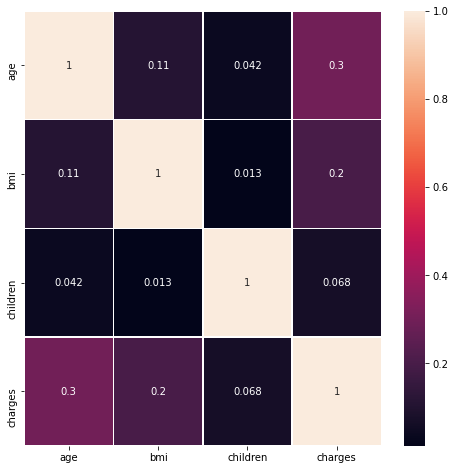

In [15]:
fig, axes = plt.subplots(figsize=(8, 8)) 
sns.heatmap(data=data.corr(), annot=True, linewidths=.5, ax=axes) 
plt.show()

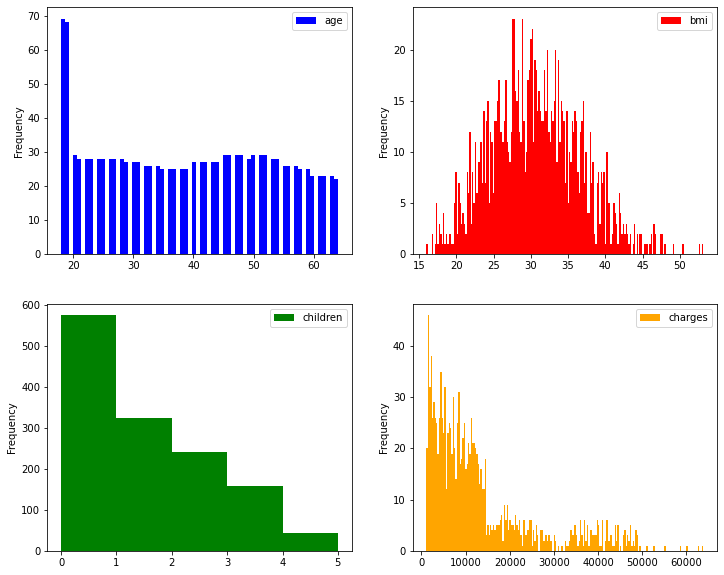

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
data.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
data.plot(kind="hist", y="bmi", bins=200, color="r", ax=axes[0][1])
data.plot(kind="hist", y="children", bins=5, color="g", ax=axes[1][0])
data.plot(kind="hist", y="charges", bins=200, color="orange", ax=axes[1][1])
plt.show()

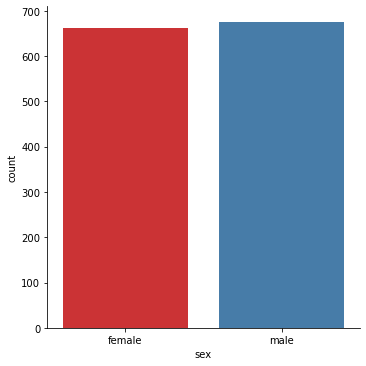

In [17]:
sns.catplot(x="sex", kind="count", palette="Set1", data=data)

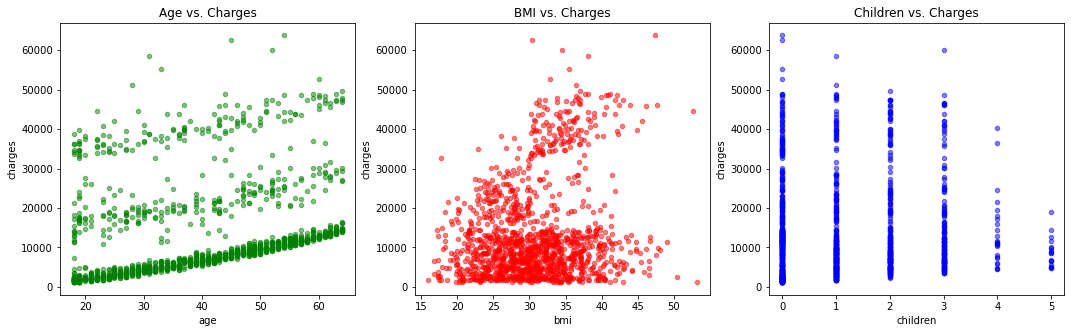

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
data.plot(kind='scatter', x='age', y='charges', alpha=0.5, color='green', ax=axes[0], title="Age vs. Charges")
data.plot(kind='scatter', x='bmi', y='charges', alpha=0.5, color='red', ax=axes[1], title="BMI vs. Charges")
data.plot(kind='scatter', x='children', y='charges', alpha=0.5, color='blue', ax=axes[2], title="Children vs. Charges")
plt.show()

<AxesSubplot:xlabel='age', ylabel='charges'>

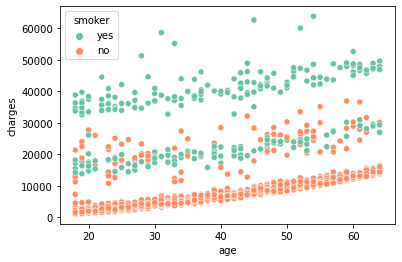

In [20]:
sns.scatterplot(x="age", y="charges", data=data, palette='Set2', hue='smoker')

In [21]:
data.drop(["region"], axis=1, inplace=True)


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB


In [23]:
data.rename(columns={"age" : "AGE", "sex" : "SEX", "bmi" : "BMI", "children" : "CHILDREN", "smoker": "SMOKER", "charges" : "CHARGES"}, inplace=True)
data.columns

Index(['AGE', 'SEX', 'BMI', 'CHILDREN', 'SMOKER', 'CHARGES'], dtype='object')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AGE       1338 non-null   int64  
 1   SEX       1338 non-null   object 
 2   BMI       1338 non-null   float64
 3   CHILDREN  1338 non-null   int64  
 4   SMOKER    1338 non-null   object 
 5   CHARGES   1338 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB


In [25]:
X = data.drop(["CHARGES"], axis=1) 
y = data.CHARGES.values

In [26]:
X.SEX = [1 if each == "female" else 0 for each in X.SEX]
X.SMOKER = [1 if each == "yes" else 0 for each in X.SMOKER]
X.head()

,AGE,SEX,BMI,CHILDREN,SMOKER
0,19,1,27.900,0,1
1,18,0,33.770,1,0
2,28,0,33.000,3,0
3,33,0,22.705,0,0
4,32,0,28.880,0,0


In [27]:
X["BMI"] = (X - np.min(X))/(np.max(X) - np.min(X)).values
X.BMI

0       0.021739
1       0.000000
2       0.217391
3       0.326087
4       0.304348
          ...   
1333    0.695652
1334    0.000000
1335    0.000000
1336    0.065217
1337    0.934783
Name: BMI, Length: 1338, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression

multiple_linear_reg = LinearRegression(fit_intercept=False)
multiple_linear_reg.fit(x_train, y_train)


LinearRegression(fit_intercept=False)

In [32]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

y_pred_MLR_train = multiple_linear_reg.predict(x_train)
y_pred_MLR_test = multiple_linear_reg.predict(x_test)

accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)

RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)



Training Accuracy for Multiple Linear Regression Model:  0.7143592542522414
Testing Accuracy for Multiple Linear Regression Model:  0.7579384934759328
RMSE for Training Data:  6420.869365238587
RMSE for Testing Data:  6130.2317925873795


/Users/ethan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

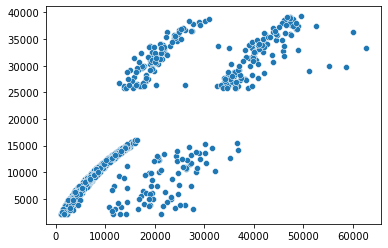

In [33]:
sns.scatterplot(y_train, y_pred_MLR_train)

In [35]:
multiple_linear_reg.coef_


array([  122.76377454,   -56.9291132 ,  6949.69533314,   406.71013031,
       23662.57118166])